# Monte Carlo Portfolio
#### This notebook implements a simple Monte Carlo portfolio simulation using historical market data.
#### The goal is to explore the risk–return trade-off and identify portfolios with maximum Sharpe ratio and minimum volatility.

#### Required libraries: numpy, pandas, matplotlib, yfinance

## 1. Import Required Libraries

In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

## 2. Download Historical Price Data

In [27]:
tickers = ["ASML.AS","AIR.PA","ENEL.MI","BNP.PA","INGA.AS"]

start = dt.datetime(2017,1,1)
end = dt.datetime.now()

prices = yf.download(tickers, start=start, end=end)["Close"]

monthly_prices = prices.resample("M").last()
returns = monthly_prices.pct_change().dropna()

returns.head()

[*********************100%***********************]  5 of 5 completed
C:\Users\siahi\AppData\Local\Temp\ipykernel_15572\908964161.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = prices.resample("M").last()


Ticker,AIR.PA,ASML.AS,BNP.PA,ENEL.MI,INGA.AS
Date,,,,,
2017-02-28,0.104525,0.018239,-0.068435,0.048654,-0.017736
2017-03-31,0.028996,0.086937,0.132414,0.089338,0.088744
2017-04-30,0.060732,-0.014867,0.037642,-0.011327,0.054693
2017-05-31,-0.015627,-0.031726,0.010880,0.090284,0.023941
2017-06-30,-0.014644,-0.028936,0.003820,-0.013451,0.014104


## 3. Compute Monthly Returns

In [30]:
mean_monthly = returns.mean()
cov_monthly = returns.cov()

mean_annual = mean_monthly * 12
cov_annual = cov_monthly * 12

## 4. Generate Random Portfolio Weights (Monte Carlo Simulation)

In [37]:
num_portfolios = 15000
n_assets = len(tickers)

all_weights = []

for i in range(num_portfolios):
    w = np.random.random(n_assets)
    w = w / np.sum(w)
    all_weights.append(w)

all_weights = np.array(all_weights)


## 5. Compute Portfolio Return, Volatility and Sharpe Ratio

In [32]:
all_returns = []
all_volatility = []
all_sharpe = []

for w in all_weights:
    
    port_return = np.dot(w, mean_annual)
    port_vol = np.sqrt(np.dot(w.T, np.dot(cov_annual, w)))
    
    sharpe = port_return / port_vol
    
    all_returns.append(port_return)
    all_volatility.append(port_vol)
    all_sharpe.append(sharpe)

## 7. Identify Maximum Sharpe and Minimum Volatility Portfolios

In [33]:
max_sharpe_index = np.argmax(all_sharpe)
min_vol_index = np.argmin(all_volatility)

best_weights = all_weights[max_sharpe_index]
low_risk_weights = all_weights[min_vol_index]

## 8. Visualize Risk–Return Distribution

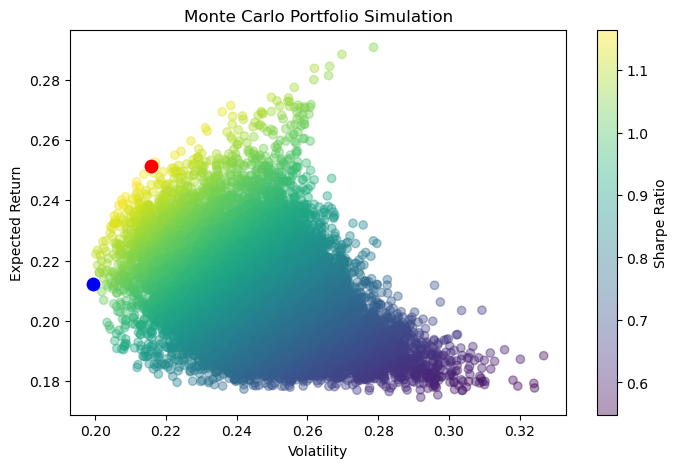

In [34]:
plt.figure(figsize=(8,5))

plt.scatter(all_volatility, all_returns, 
            c=all_sharpe, cmap="viridis", alpha=0.4)

plt.colorbar(label="Sharpe Ratio")

plt.scatter(all_volatility[max_sharpe_index],
            all_returns[max_sharpe_index],
            color="red", s=80)

plt.scatter(all_volatility[min_vol_index],
            all_returns[min_vol_index],
            color="blue", s=80)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Monte Carlo Portfolio Simulation")
plt.show()

## 9. Display Optimal Portfolio Weights

In [35]:
print("Max Sharpe Portfolio")
print(pd.Series(best_weights, index=tickers))

print("\nMinimum Volatility Portfolio")
print(pd.Series(low_risk_weights, index=tickers))

Max Sharpe Portfolio
ASML.AS    0.009477
AIR.PA     0.481436
ENEL.MI    0.025463
BNP.PA     0.468865
INGA.AS    0.014760
dtype: float64

Minimum Volatility Portfolio
ASML.AS    0.065001
AIR.PA     0.199044
ENEL.MI    0.016737
BNP.PA     0.691699
INGA.AS    0.027519
dtype: float64
